<a href="https://colab.research.google.com/github/Stephen-Raj-A/SDC-GENAI/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5291 - loss: 0.6917 - val_accuracy: 0.7250 - val_loss: 0.6707
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7615 - loss: 0.6581 - val_accuracy: 0.8450 - val_loss: 0.6022
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8323 - loss: 0.5679 - val_accuracy: 0.8950 - val_loss: 0.4310
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8609 - loss: 0.4040 - val_accuracy: 0.9400 - val_loss: 0.2342
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9330 - loss: 0.2179 - val_accuracy: 0.9300 - val_loss: 0.1771
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9271 - loss: 0.1971 - val_accuracy: 0.9650 - val_loss: 0.1162
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9381 - loss: 0.1434 - val_accuracy: 0.9450 - val_loss: 0.1239
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9489 - loss: 0.1225 - val_accuracy: 0.9700 - val_lo

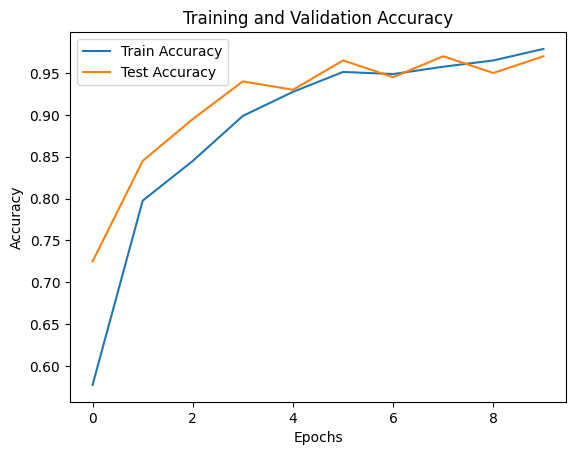

In [3]:
!pip install numpy tensorflow scikit-learn matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate some example sequential data for classification
# Let's assume we're working with a simple binary classification problem

# Example sequence data (e.g., sequences of length 5)
X = np.random.rand(1000, 5, 1)  # 1000 sequences, each of length 5, with 1 feature per time step
y = (X[:, 0, 0] + X[:, 1, 0] > 1).astype(int)  # Target is 1 if sum of first two features > 1, else 0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()

# Add a SimpleRNN layer with 50 units
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dense layer for binary classification (output layer)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, plot training history (loss and accuracy)
import matplotlib.pyplot as plt

# Print history keys to check the available metrics
print(history.history.keys())  # This will show available metrics

# Adjust the plotting code to handle the correct metric name
plt.plot(history.history['accuracy'], label='Train Accuracy')  # 'accuracy' or 'acc'
plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # 'val_accuracy' or 'val_acc'
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

